# Building the Digraph
By parsing csv files, we create the directed graph representing who follows who in the NBA. A directed edge goes **from A to B, if A follows B**.


In [25]:
# dependencies and constants
import os, csv, operator
import numpy as np
from sklearn.preprocessing import normalize
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
FILE_EXT_NUM = -14
FILE_EXT     = "_processed.csv"
DIR          = "../processed"

In [26]:
# create digraph
G = nx.DiGraph()

In [27]:
# add a node for each player
os.chdir(DIR)
for file in os.listdir():
    if file[-14:] == FILE_EXT: # ignore hidden files
        G.add_node(file[:FILE_EXT_NUM])

In [28]:
# add directed edges between players
for node in G.adj:
    with open(str(node + FILE_EXT), 'r') as file:
        for line in file.readlines():
            line = line.strip()
            for player in G.adj:
                if player == line and player != node:
                    G.add_edge(node, line)

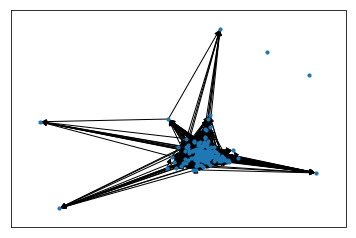

In [29]:
# print graph
nx.draw_networkx(G, with_labels=False, node_size=10)
plt.draw()
plt.show()

In [30]:
# Find players who don't follow any other players
for player in G.nodes:
    others = 0
    for neighbor in G.neighbors(player):
        others += 1
    if (others == 0):
        print(player)

markellefultz
supermariohezonja
mkg14
abrooksart
andrewbogut
eneskanter11


# Computing Importance with PageRank
In this section, we compute the importance score of each player in the network. We do this through two methods: first, a manual computation using the ```numpy``` library; then, a one-line computation with ```networkx``` built-in methods as a correctness check. We also compute importance with a variety of other metrics, including eigenvector centrality. 

In [31]:
# compute H matrix (normalized with no all-zero rows)
A = nx.adjacency_matrix(G).todense()
dim = A.shape[0]
row_sums = A.sum(axis=1)
H = normalize(A, axis=1, norm='l1')
for i in range(0, dim):
    if int(row_sums[i]) is 0:
        for j in range(len(H[i])):
            H[i, j] = 1.0/dim

# Ensure there are no zero rows
# row_sums_2 = H.sum(axis=1)
# for row_sum in row_sums_2:
#     if row_sum == 0:
#         print("zero row sum")

# perform iterations to get the importance vector
theta = 0.85

# Compute Google Matrix
G_matrix = theta * H + (1 - theta) * (1.0 / dim) * np.ones((dim, dim))

# Set an initial pi vector (normalized)
pi = np.ones(dim)
for i in range(0, dim):
    if i is not 0:
        pi[i] = 0

# Perform 1000 iterations of PageRank
for i in range(0, 1000):
    pi = pi.dot(G_matrix)
# print(np.sort(pi))

In [45]:
# Add follower count to an associative array
os.chdir("../scripts/count")
counts = {}
with open("counts.csv", "r") as f:
    reader = csv.reader(f)
    for line in reader:
        counts[line[0]] = line[1]
#         print(line[0] + "," + line[1])

os.chdir("../../processed")

#### Compute Eigenvector, Betweenness, Load Centrality, and PageRank Importance

In [46]:
# Do PageRank with networkx built in method. Ensure output 
# identical to the above results. 
pr = nx.pagerank(G, alpha = 0.85)
pagerank = sorted(pr.items(), key=operator.itemgetter(0))
eigen    = sorted(nx.eigenvector_centrality(G).items(), key=operator.itemgetter(0))
load     = sorted(nx.load_centrality(G).items(), key=operator.itemgetter(0))
betw     = sorted(nx.betweenness_centrality(G).items(), key=operator.itemgetter(0))

with open("metrics.csv", "w") as f:
    f.write("username,pagerank,eigen,load,betw,followers\n")
    
with open("metrics.csv", "a") as f:
    for i in range(len(pagerank)):
        foundFollowers = False
        f.write(pagerank[i][0] + "," + str(pagerank[i][1]) + "," + str(eigen[i][1]) + "," 
                  + str(load[i][1]) + "," + str(betw[i][1]) + ",")
        for key, value in counts.items():
            if str(pagerank[i][0]) == str(key):
                f.write(str(value) + "\n")
                foundFollowers = True
        if not foundFollowers:
            f.write("\n")
        

os.rename("./metrics.csv", "../scripts/metrics.csv")

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
foun

# Plotting All-Star votes against Importance
Here, for a small subset of players we plot their All-Star votes against their importance score to discern some sort of relationship. 

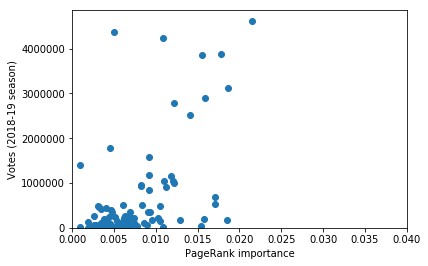

mean importance: 0.006647377957677644


In [16]:
# Change working directory
if os.getcwd()[-13:] != "allstar-votes":
    os.chdir("../../allstar-votes")

# Get the importance of a given player
def get_imp(username):
    for player in pr_sorted:
        if player[0] == username:
            return player[1]
    return -1 # if importance not found

# Get the votes for a given player, in 2018-19 season
def get_votes_19(name):
    os.chdir("./votes")
    with open("votes19.csv", "r") as f:
        reader = csv.reader(f)
        for line in reader:
            if line[0] == name:
                os.chdir("..")
                return line[1]
    os.chdir("..")
    return -1 # if votes not found
    
# Store players, their votes, and their importance
stats = {}
with open("names-and-handles.csv", "r") as f:
    reader = csv.reader(f)
    for line in reader:
        if line[1] and line[1] != "null": # if there is a username
            stats[line[0]] = {
                'username': line[1],
                'imp': get_imp(line[1]),
                'votes': get_votes_19(line[0]),
            }

# Plot votes against importance (importance: X-axis, votes: Y-axis)
imp   = []
votes = []
for player, stat in stats.items():
    if stat['imp'] != -1 and stat['votes'] != -1:
        imp.append(float(stat['imp']))
        votes.append(float(stat['votes']))
plt.scatter(imp, votes)
plt.xticks([0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('PageRank importance')
plt.ylabel('Votes (2018-19 season)')
plt.show()

# Print mean
print('mean importance: ', end='')
print(np.mean(imp))